<font color="#CC3D3D"><p>
# Build Models with W2V

- `INPUT`: 학습용(`X_train.csv`, `y_train`)과 평가용(`X_test.csv`) 데이터 
- `OUTPUT`: 위 데이터를 이용하여 구축한 모형이 생성한 예측결과(`submission.csv`)

##### Imports

In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile
from sklearn.decomposition import PCA

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.base import ClassifierMixin

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

### 1. Read Transactions

In [2]:
X_train = pd.read_csv(os.path.abspath("../dat")+'/X_train_w2v.csv', encoding='cp949')
X_test = pd.read_csv(os.path.abspath("../dat")+'/X_test_w2v.csv', encoding='cp949')
        
# 전처리를 동일하게 적용하기 위해 두 데이터를 합한다.
train_id = X_train['cust_id']
test_id = X_test['cust_id']
del X_train['cust_id'], X_test['cust_id']

# 학습용 정답 데이터를 읽는다.
y_train = pd.read_csv(os.path.abspath("../dat")+'/y_train.csv', encoding='cp949').gender

### 4. Model Tuning (Hyperparameter Optimization)

In [3]:
# 학습데이터 70%, 평가데이터 30%로 데이터 분할
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [4]:
clf = RandomForestClassifier(random_state=0)

param_grid = {'n_estimators': [260],
         'min_samples_split': [5],
         'min_samples_leaf': [6],
         'min_impurity_decrease': [0.0005],
         'max_features': ['auto'],
         'max_depth': [7],
         'criterion': ['gini'],
         'class_weight': ['balanced'],
         'bootstrap': [True]}


#RandomizedSearchCV를 이용해 하이퍼 파라미터 탐색
clf = RandomizedSearchCV(clf, param_grid,scoring='roc_auc', cv=5, n_iter = 30, n_jobs=-1) 
clf.fit(X_train,y_train)
print('final params', clf.best_params_)
print('best score', clf.best_score_)
print(clf.score(X_dev,y_dev))

final params {'n_estimators': 260, 'min_samples_split': 5, 'min_samples_leaf': 6, 'min_impurity_decrease': 0.0005, 'max_features': 'auto', 'max_depth': 7, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}
best score 0.7496682430339809
0.7524945099251941


In [5]:
clf = XGBClassifier(random_state = 0)

param_grid = {'subsample': [0.3], 
          'n_estimators': [140],
          'min_child_weight': [4],
          'max_depth': [3],
          'learning_rate': [0.021],
          'colsample_bytree': [0.7]}

#RandomizedSearchCV를 이용해 하이퍼 파라미터 탐색
clf = RandomizedSearchCV(clf, param_grid,scoring='roc_auc', cv=5, n_iter = 100, n_jobs=-1)
clf.fit(X_train,y_train)
print('final params', clf.best_params_)
print('best score', clf.best_score_)
print(clf.score(X_dev,y_dev))

final params {'subsample': 0.3, 'n_estimators': 140, 'min_child_weight': 4, 'max_depth': 3, 'learning_rate': 0.021, 'colsample_bytree': 0.7}
best score 0.7630894160273912
0.7518486187715542


In [6]:
clf = MLPClassifier(random_state=0)
param_grid = {'solver': ['adam'],
         'learning_rate': ['invscaling'],
         'hidden_layer_sizes': [(32,)],
         'batch_size': [64],
         'alpha': [0.30000000000000004],
         'activation': ['relu']}

#RandomizedSearchCV를 이용해 하이퍼 파라미터 탐색
clf = RandomizedSearchCV(clf, param_grid,scoring='roc_auc', cv=5, n_jobs=-1)
clf.fit(X_train,y_train)
print('final params', clf.best_params_)
print('best score', clf.best_score_)
print(clf.score(X_dev,y_dev))

final params {'solver': 'adam', 'learning_rate': 'invscaling', 'hidden_layer_sizes': (32,), 'batch_size': 64, 'alpha': 0.30000000000000004, 'activation': 'relu'}
best score 0.7563682895366836
0.7613197317790192


In [7]:
clfs = [
    (
        LogisticRegression(random_state=0),  
        {'C': [1.0],      
         'penalty': ['l2']}
    ),
    (
        RandomForestClassifier(random_state=0),
        {'n_estimators': [260],
         'min_samples_split': [5],
         'min_samples_leaf': [6],
         'min_impurity_decrease': [0.0005],
         'max_features': ['auto'],
         'max_depth': [7],
         'criterion': ['gini'],
         'class_weight': ['balanced'],
         'bootstrap': [True]}
    ),
    (
        XGBClassifier(random_state=0),
        {'subsample': [0.3], 
          'n_estimators': [140],
          'min_child_weight': [4],
          'max_depth': [3],
          'learning_rate': [0.021],
          'colsample_bytree': [0.7]}
    ),
    (
         SVC(probability=True, random_state=0),
       {'kernel': ['poly'],
         'C' : [0.9]}
    ),
    (
        MLPClassifier(random_state=0),
        {'solver': ['adam'],
         'learning_rate': ['invscaling'],
         'hidden_layer_sizes': [(32,)],
         'batch_size': [64],
         'alpha': [0.30000000000000004],
         'activation': ['relu']}
    
    )
]

clfs_tuned = []  # 튜닝된 모델을 저장
for clf, param_grid in tqdm(clfs):
    start = time.time()
    rand_search = GridSearchCV(clf, param_grid, scoring='roc_auc', 
                                     cv=5, n_jobs=-1)
    rand_search.fit(X_train, y_train)
    clf_name = type(clf).__name__
    clf_score = rand_search.score(X_dev, y_dev)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    clfs_tuned.append((clf_name, rand_search, clf_score))

 20%|████████████████▊                                                                   | 1/5 [00:01<00:04,  1.20s/it]

LogisticRegression                                   0.763539 1.2


 40%|█████████████████████████████████▌                                                  | 2/5 [00:19<00:18,  6.25s/it]

RandomForestClassifier                               0.752495 18.1


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:35<00:18,  9.29s/it]

XGBClassifier                                        0.751849 16.4


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [02:07<00:33, 33.93s/it]

SVC                                                  0.763559 91.4


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:23<00:00, 28.75s/it]

MLPClassifier                                        0.761320 16.7


### 5. Model Ensemble

*Correlation between models*

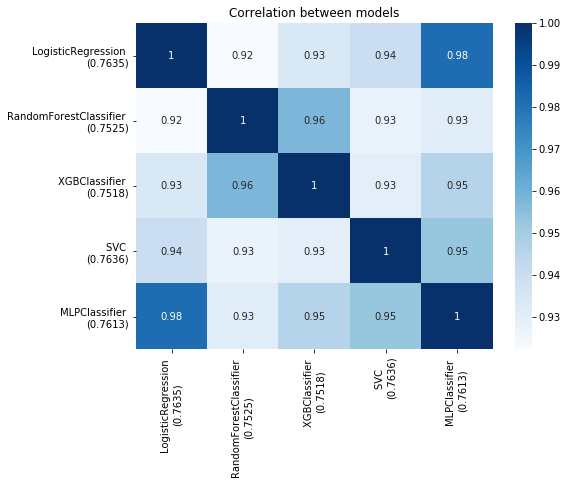

In [8]:
pred_results = []
for name, clf, clf_score in clfs_tuned:
    pred = clf.predict_proba(X_dev)[:,1]
    name = f'{name} \n({clf_score:.4f})'
    pred_results.append(pd.Series(pred, name=name))
ensemble_results = pd.concat(pred_results, axis=1)

# 모형의 예측값 간의 상관관계를 보기 위해 hitmap을 도식한다.
plt.figure(figsize = (8,6))
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='Blues')
g.set_title("Correlation between models")
plt.show()

*Mean agreement vs. Performance*

In [9]:
# Mean agreement
(ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)

LogisticRegression \n(0.7635)        0.944358
RandomForestClassifier \n(0.7525)    0.934688
XGBClassifier \n(0.7518)             0.941955
SVC \n(0.7636)                       0.937507
MLPClassifier \n(0.7613)             0.952851
dtype: float64

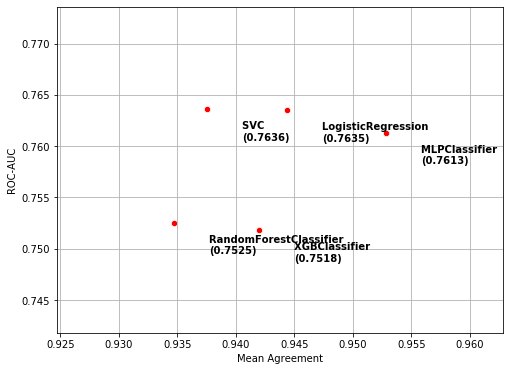

In [10]:
corr = (ensemble_results.corr().sum()-1)/(ensemble_results.corr().shape[0]-1)
names = corr.index
aucs = np.array(corr.index.str[-7:-1]).astype(float)
df = pd.DataFrame({'model': names, 'auc': aucs, 'cor': corr})        

plt.figure(figsize=(8,6))
g = sns.scatterplot(x="cor", y="auc", data=df, s=40, color='red')
for line in range(0, df.shape[0]):
     g.text(df.cor[line]+0.003, df.auc[line]-0.003, 
            df.model[line], horizontalalignment='left', 
            size='medium', color='black', weight='semibold')
        
plt.xlim((df.cor.min()-0.01,df.cor.max()+0.01))
plt.ylim((df.auc.min()-0.01,df.auc.max()+0.01))
plt.xlabel('Mean Agreement')
plt.ylabel('ROC-AUC')
plt.grid()
plt.show()

*Averaging Ensemble*

In [11]:
# Averaging 앙상블에 사용하지 않을 모델은 주석 처리하시오.
selected = [
    'LogisticRegression', 
    'RandomForestClassifier', 
    'SVC',
    'XGBClassifier',
    'MLPClassifier'
]
models_for_ensemble = [clf for clf in clfs_tuned if clf[0] in selected]

In [12]:
max_score = 0
for p in tqdm([0, 1, 3.5]):  # p==1:산술평균, p=0:기하평균, 그 외:멱평균(주의:멱평균은 과적합 가능성이 높음)    
    for i in range(2, len(models_for_ensemble)+1):
        for models in combinations(models_for_ensemble, i):
            if p == 0:
                pred_mean = gmean([clf.predict_proba(X_dev)[:,1] for name, clf, _ in models], axis=0)
            else:
                preds = [clf.predict_proba(X_dev)[:,1] for name, clf, _ in models]
                pred_mean = (np.sum(np.array(preds)**p, axis=0) / len(models))**(1/p)
            score = roc_auc_score(y_dev, pred_mean)
            if max_score < score:
                best_avg_ensemble = (p, models, score)
                max_score = score

p, models, score = best_avg_ensemble
print('p={}\n{}\n{}'.format(p, '●'.join([clf_name for clf_name, _, _ in models]), score))

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:03<00:00, 61.01s/it]

p=1
LogisticRegression●RandomForestClassifier●SVC
0.7668352507819198


<font color="#CC3D3D"><p>
!!! 아래 셀 코드의 버그를 수정하였음 !!!

In [13]:
# sklearn의 다른 classifier와 호환성을 갖기위해 Custom Classifier인 "AveragingClassifier" 생성

class AveragingClassifier(ClassifierMixin):
    def __init__(self, estimators, p):
        self.estimators = estimators
        self.p = p
    
    def fit(self, X, y):
        return None

    def predict(self, X):
        if self.p == 0:
            pred = gmean([clf.predict(X) for name, clf in self.estimators], axis=0)
        else:
            preds = [clf.predict(X) for name, clf in self.estimators]
            pred = (np.sum(np.array(preds)**self.p, axis=0) / len(self.estimators))**(1/self.p)
        return pred
         
    def predict_proba(self, X):
        if self.p == 0:
            prob = gmean([clf.predict_proba(X) for name, clf in self.estimators], axis=0)
        else:
            probs = [clf.predict_proba(X) for name, clf in self.estimators]
            prob = (np.sum(np.array(probs)**self.p, axis=0) / len(self.estimators))**(1/self.p)
        return prob
    
estimators = [(name, clf) for name, clf, _ in models]
avg_clf = AveragingClassifier(estimators, p)
avg_clf.fit(X_train, y_train)    

### 6. Deployment

In [14]:
pd.DataFrame({'cust_id': test_id, 'gender': avg_clf.predict_proba(X_test)[:,1]}).to_csv(os.path.abspath("../dat")+'/submissions/조기흠-submission-features-W2V.csv', index=False)

<font color="#CC3D3D"><p>
# End